# Statistics Mini Project

<a id="lib"></a>
## 1. Import Libraries

**Let us import the required libraries.**

In [68]:
# import 'pandas' 
import pandas as pd 

# import 'numpy' 
import numpy as np

# import subpackage of matplotlib
import matplotlib.pyplot as plt

# import 'seaborn'
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# import statsmodels
import statsmodels.api as sm

# import 'stats' package from scipy library
from scipy import stats

# import statistics to perform statistical computations
import statistics

# to test the normality 
from scipy.stats import shapiro

# import a library to perform Z-test
from statsmodels.stats import weightstats as stests

# import random
import random

# import ztest 
from statsmodels.stats.weightstats import ztest


In [2]:
# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [15,8]


**1. Perform the following statistical analysis on the fifa world cup dataset. The dataset consists of player information which includes height, weight overall rating, potential etc. Data Cleaning and basic EDA process needs to be performed.**

a) Assuming age as population, perform the central limit theorem with sample size of 200. Find the standard error and the mean of sampling distribution. Compare the results with population mean and standard deviation. Explain in non-technical terms why the estimated standard error of a sample mean tends to decrease with an increase in sample size

b) Is there any evidence that the players overall rating is greater than 80?

c) Perform the statistical test to identify whether preferred foot has any impact on potential. Also, perform the graphical analysis.

d) Perform the statistical test to identify the relation between the overall rating and potential. [Assume both are continuous data points].

e) Does skill move have any effect in overall rating. Perform the graphical analysis and the statistical analysis.


**Note:**
1) Perform all the Statistical analysis with 5%(Significance level).\
2) Perform the test of normality and test of variance in the appropriate places.

In [3]:
df = pd.read_csv('fifa_stats.csv') 
df.head()

,Name,Age,Nationality,Overall_rating,Potential,Club,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Height,Weight
0,L. Messi,31,Argentina,94,94,FC Barcelona,Left,5,4,4,Medium/ Medium,RF,10,5.583333,159
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,Right,5,4,5,High/ Low,ST,7,6.166667,183
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,Right,5,5,5,High/ Medium,LW,10,5.750000,150
3,De Gea,27,Spain,91,93,Manchester United,Right,4,3,1,Medium/ Medium,GK,1,6.333333,168
4,K. De Bruyne,27,Belgium,91,92,Manchester City,Right,4,5,4,High/ High,RCM,7,5.083333,154


In [4]:
df.shape

(2000, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      2000 non-null   object 
 1   Age                       2000 non-null   int64  
 2   Nationality               2000 non-null   object 
 3   Overall_rating            2000 non-null   int64  
 4   Potential                 2000 non-null   int64  
 5   Club                      1981 non-null   object 
 6   Preferred Foot            2000 non-null   object 
 7   International Reputation  2000 non-null   int64  
 8   Weak Foot                 2000 non-null   int64  
 9   Skill Moves               2000 non-null   int64  
 10  Work Rate                 2000 non-null   object 
 11  Position                  2000 non-null   object 
 12  Jersey Number             2000 non-null   int64  
 13  Height                    2000 non-null   float64
 14  Weight  

In [6]:
df.dropna(inplace=True)

In [7]:
df.rename(columns={"Preferred Foot":"Preferred_Foot", "Skill Moves":"Skill_moves"}, inplace=True)

**a) Assuming age as population, perform the central limit theorem with sample size of 200. Find the standard error and the mean of sampling distribution. Compare the results with population mean and standard deviation. Explain in non-technical terms why the estimated standard error of a sample mean tends to decrease with an increase in sample size**

In [8]:
sample_lst = []
n = 200

for i in range(50):
    sample_lst.append(np.mean(random.sample(population=list(df['Age']), k=n)))

sigma = np.std(df['Age'])
se = sigma/np.sqrt(n)

print("Population Mean:", np.mean(df['Age']))
print("Sampling Distribution Mean:", np.mean(sample_lst))
print("Population Standard Deviation:", sigma)
print("Standard Error:", se)

Population Mean: 27.215547703180214
Sampling Distribution Mean: 27.2008
Population Standard Deviation: 3.8515461098126726
Standard Error: 0.2723454372301208


In [9]:
# The population mean and the sampling distribution mean are almost equal with a differnce of just a few decimal places.
# As we increase the sample size, the Standard Error/Standard Deviation of the Sampling Distribution tends to decrease
# because as we increase the sample size, the sample itself starts appropriating the population distribution and sample's
# mean starts coming closer to the actual population mean.
# And if we increase the sample size by enough such that it takes the shape of the population then the standard error
# starts approaching zero.

**b) Is there any evidence that the players overall rating is greater than 80?**

Ho: Players' overall rating <= 80\
H1: Players' overall rating > 80

In [10]:
popmean = 80

random.seed(42)
sample_1 = random.sample(population=list(df['Overall_rating']), k=200)
sigma = np.std(df['Overall_rating'])
n = 200
se = sigma/np.sqrt(n)
xbar = np.mean(sample_1)

inter = stats.norm.interval(0.95, loc=xbar, scale=se)
stat = (xbar - popmean)/se
z_crit = stats.norm.ppf(0.95)
pval = stats.norm.sf(stat)

print("Z Critical:", z_crit)
print("Z Statistic:", stat)
print("CI 95%:", inter)
print('pvalue',pval)

Z Critical: 1.6448536269514722
Z Statistic: -7.53750809919555
CI 95%: (77.78865066709051, 78.7013493329095)
pvalue 0.999999999999976


In [11]:
# Fail to reject the null
# Therefore, We can say that on average, Players have an overall rating of less than or equal to 80

**c) Perform the statistical test to identify whether preferred foot has any impact on potential. Also, perform the graphical analysis.**

Ho: Preferred Foot has no effect on Players' Potential\
H1: Preferred Foot has an effect on Players' Potential

In [12]:
model = sm.formula.ols("Potential ~ Preferred_Foot", data=df).fit()
sm.stats.anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
Preferred_Foot,1.0,45.107303,45.107303,2.662185,0.102919
Residual,1979.0,33531.616574,16.943717,NaN,NaN


In [13]:
# Since, P value is greater than 0.05 significane level, We fail to reject the null
# Therefore, we can say that Preferred Foot has no effect on Players' Potential

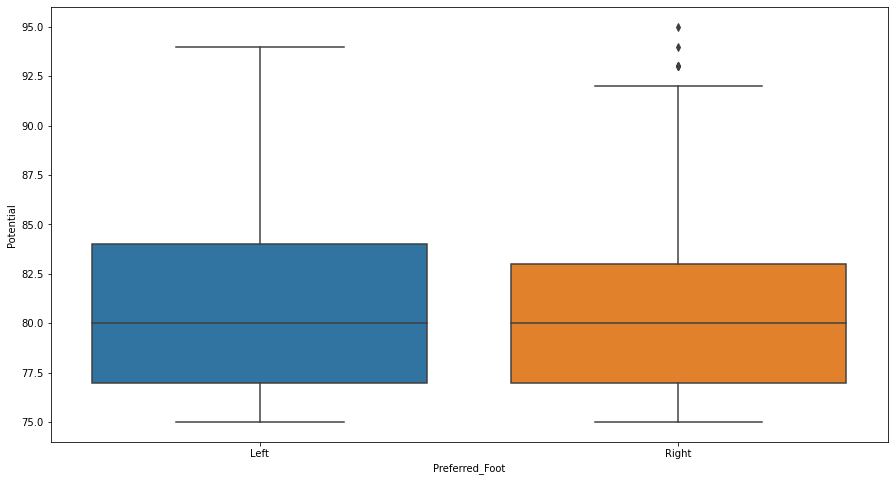

In [14]:
sns.boxplot(data=df, x='Preferred_Foot', y='Potential')
plt.show()

In [15]:
# As we can see in the boxplot that preferred foot, does not affect player's potential

**d) Perform the statistical test to identify the relation between the overall rating and potential. [Assume both are continuous data points].**

In [69]:
shapiro(df['Overall_rating'])

TypeError: 'int' object is not subscriptable

In [16]:
df[['Overall_rating', 'Potential']].corr()

,Overall_rating,Potential
Overall_rating,1.000000,0.732086
Potential,0.732086,1.000000


In [17]:
# Therefore, we can see that there is moderately high relation between the two variables

Ho: No effect of Potential on Overall Rating\
H1: There is an effect of Potential on Overall Rating

In [18]:
teststats, pval = ztest(x1=df['Overall_rating'], x2=df['Potential'], value=0)
print("P Value:", pval)

P Value: 2.365099906058412e-71


In [19]:
# Reject the null
# Therefore, we can say that potential has an effect no Overall Rating of the Player

**e) Does skill move have any effect in overall rating. Perform the graphical analysis and the statistical analysis.**

In [70]:
df['Overall_rating']

TypeError: 'int' object is not subscriptable

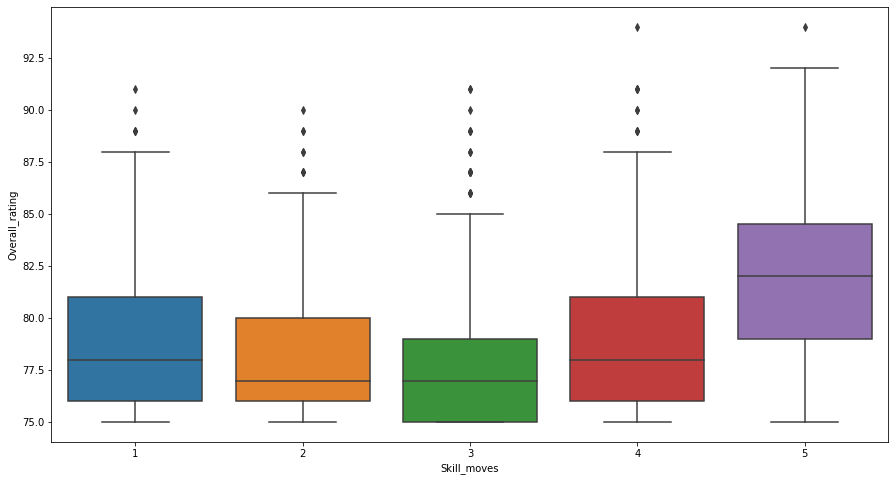

In [20]:
sns.boxplot(df['Skill_moves'], df['Overall_rating']);

In [21]:
## Players with skill moves 4 and 5 seem to have better overall rating than that of the other players.

Ho: No effect of Skill moves on Overall Rating\
H1: There is an effect of Skill moves on Overall Rating


In [22]:
model = sm.formula.ols("Overall_rating ~ Skill_moves", data=df).fit()
sm.stats.anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
Skill_moves,1.0,148.098437,148.098437,13.74004,0.000216
Residual,1979.0,21330.855627,10.778603,NaN,NaN


In [23]:
analysis = sm.stats.multicomp.MultiComparison(data=df['Overall_rating'], groups=df['Skill_moves'])

pc = analysis.tukeyhsd()
pc.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,-0.7167,0.0819,-1.4861,0.0527,False
1,3,-1.1788,0.001,-1.8792,-0.4783,True
1,4,0.0997,0.9,-0.6343,0.8336,False
1,5,3.486,0.001,1.9518,5.0201,True
2,3,-0.462,0.1292,-0.9986,0.0745,False
2,4,0.8164,0.0012,0.2368,1.396,True
2,5,4.2027,0.001,2.7361,5.6693,True
3,4,1.2784,0.001,0.7941,1.7627,True
3,5,4.6648,0.001,3.2331,6.0964,True
4,5,3.3863,0.001,1.938,4.8346,True


In [24]:
## Hence we can clearly state that differnt group of skill moves have varrying contribution to the player's rating, 
#thus both the mentioned columns aren't independent, as proved statistically.


**2. Perform the following statistical analysis on the mobile network dataset given. The given data set contains information about the internet, calls, messages of various network. Data Cleaning and basic EDA process needs to be performed.**

a) With 95% & 99% Confidence Interval find the range estimate of average duration calls made by all the network. Which of the Intervals are wider? Interpret the results.\
b) Perform statistical analysis to check whether the networks are equally distributed in the dataset.\
c) Plot the distribution of duration with respect to each network in the same graph and Interpret the results from the graph.\
d)	Perform statistical tests to identify the relation between item and duration. Detailed 
explanation of relation between the classes is required.\
e)	Perform statistical tests to identify the relation between network and network_type. 


**Note:**
1) Perform all the Statistical analysis with 5%(Significance level).\
2) Perform the test of normality and test of variance in the appropriate places.


In [25]:
mob = pd.read_csv("phone.csv")
mob.head()

,date,duration,item,month,network,network_type
0,15-10-14 6:58,221.321120,data,2014-11,data,data
1,15-10-14 6:58,81.610599,call,2014-11,Vodafone,mobile
2,15-10-14 14:46,143.109111,call,2014-11,Meteor,mobile
3,15-10-14 14:48,111.888670,call,2014-11,Tesco,mobile
4,15-10-14 17:27,246.695171,call,2014-11,Tesco,mobile


In [26]:
mob.shape

(820, 6)

In [27]:
mob.isna().sum()

date            0
duration        0
item            0
month           0
network         0
network_type    0
dtype: int64

In [28]:
mob.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820 entries, 0 to 819
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          820 non-null    object 
 1   duration      820 non-null    float64
 2   item          820 non-null    object 
 3   month         820 non-null    object 
 4   network       820 non-null    object 
 5   network_type  820 non-null    object 
dtypes: float64(1), object(5)
memory usage: 38.6+ KB


In [29]:
mob['date'] = pd.to_datetime(mob['date'])

In [30]:
mob['month'] = pd.to_datetime(mob['month']).dt.month

In [31]:
mob.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820 entries, 0 to 819
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          820 non-null    datetime64[ns]
 1   duration      820 non-null    float64       
 2   item          820 non-null    object        
 3   month         820 non-null    int64         
 4   network       820 non-null    object        
 5   network_type  820 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 38.6+ KB


**a) With 95% & 99% Confidence Interval, find the range estimate of average duration calls made by the entire network. Which of the Intervals are wider? Interpret the results.**

In [43]:
shapiro(mob['duration'])

ShapiroResult(statistic=0.9984679818153381, pvalue=0.701244592666626)

In [32]:
mu = np.mean(mob['duration'])
sigma = np.std(mob['duration'])

interval_1 = stats.norm.interval(0.95, loc=mu, scale=sigma)
interval_2 = stats.norm.interval(0.99, loc=mu, scale=sigma)
print("CI 95%:", interval_1)
print("CI 99%:", interval_2)

CI 95%: (54.81315656633359, 233.79671455333732)
CI 99%: (26.692801573465673, 261.91706954620525)


In [33]:
# The 99% confidence interval is wider than the 95% confidence interval
# As we increase our confidence level, we lose our accuracy for the estimation of our range
# and hence get a wider spread interval.

**b) Perform statistical analysis to check whether the networks are equally distributed in the dataset.**

Ho: Networks are present in equal proportions\
H1: Networks are disproportionately spread

In [34]:
net = pd.DataFrame(mob['network'].value_counts()).T
net

,Vodafone,Three,data,Meteor,Tesco,landline,voicemail
network,215,215,150,87,84,42,27


In [35]:
teststats, pval, df, exp_value = stats.chi2_contingency(net)
print("P Value:", pval)

P Value: 1.0


In [36]:
# Reject the null
# Therefore, we can say that the spread of networks is disproportionate

**c) Plot the distribution of duration with respect to each network in the same graph and interpret the results from the graph.**

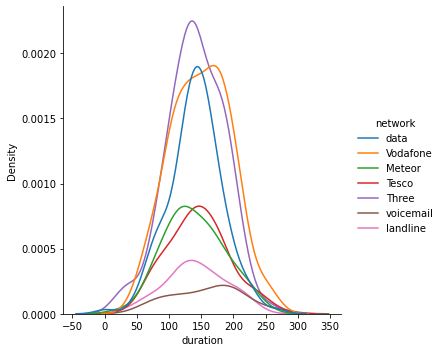

In [62]:
sns.displot(data=mob, hue='network', x='duration',kind='kde',height=5)

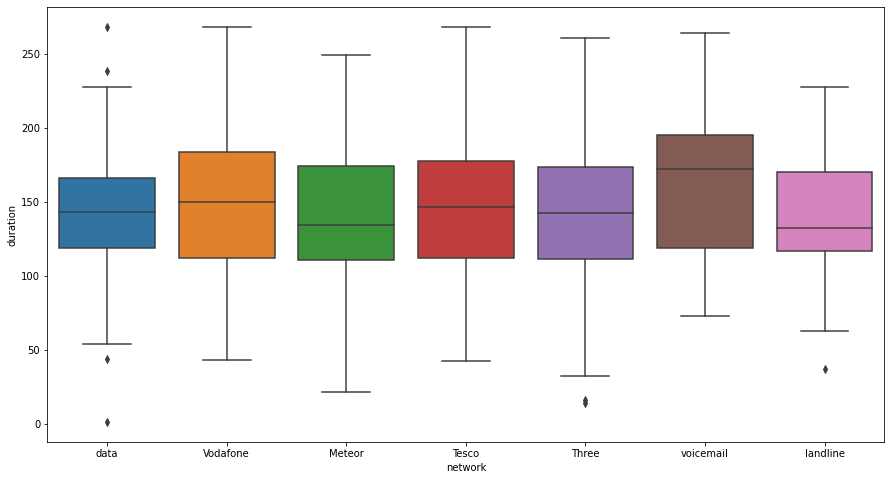

In [37]:
sns.boxplot(data=mob, x='network', y='duration')
plt.show()

In [38]:
# The median value and distribution of duration is almost the same for all networks
# Except Voicemail and landline
# Voicemail typically has higher call duration with more spread
# and landline typically has lower call duration.

**d) Perform statistical tests to identify the relation between item and duration. Detailed explanation of relation between the classes is required.**

Ho: No effect of item on duration\
H1: There is an effect of item on duration

In [58]:
shapiro(mob['duration'])


ShapiroResult(statistic=0.9984679818153381, pvalue=0.701244592666626)

In [39]:
model = sm.formula.ols("duration ~ item", data=mob).fit()
sm.stats.anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
item,2.0,8.044792e+03,4022.395964,1.931396,0.145607
Residual,817.0,1.701514e+06,2082.636053,NaN,NaN


In [40]:
# Fail to reject the null
# Therefore, We can say that there is no effect of item on duration of the call

**e) Perform statistical tests to identify the relation between network and network_type.**

Ho: Network types are equally spread across all the networks\
H1: Network types are un-equally spread across all the networks

In [41]:
tbl = pd.crosstab(mob['network_type'], mob['network'])

print(tbl)
teststats, pval, df, exp_val = stats.chi2_contingency(tbl)
print("P Value:", pval)

network       Meteor  Tesco  Three  Vodafone  data  landline  voicemail
network_type                                                           
data               0      0      0         0   150         0          0
landline           0      0      0         0     0        42          0
mobile            87     84    215       215     0         0          0
voicemail          0      0      0         0     0         0         27
P Value: 0.0


In [42]:
# Reject the null
# Therefore, we can say that Network types are un-equally spread across all the networks